### Analysis for Pendulum

## Get Dependencies

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

## Import Data

In [69]:
subject_name = "Hokin_Second_Time_"
hand = "Right_Hand"
data_path = "data/" + subject_name + hand
trials_num  = 30

Load each of the gravity condition


In [78]:
## need to update when changing
global gravity_list_10, gravity_list_15,gravity_list_20
global gravity_list_25 ,gravity_list_30,gravity_list_35 , gravity_list_40
gravity_values = [10, 15, 20, 25, 30, 35, 40]

## running code
for gravity_value in gravity_values:
    gravity_list_name = f"gravity_list_{gravity_value}"
    gravity_data_path = f"{data_path}/Gravity{gravity_value}"
    gravity_list = []

    for i in range(1, 30):
        df_this = pd.read_csv(f"{gravity_data_path}/{i}.csv")
        gravity_list.append(df_this)

    globals()[gravity_list_name] = gravity_list

In [54]:
x = 0
Gravity_10_data_path = data_path + "/Gravity10"
gravity_list_10 = []
for i in range(1, 32):

    df_this = pd.read_csv(Gravity_10_data_path + "/" + str(i) + ".csv")
    gravity_list_10.append(df_this)
    if x < 2:
        print(df_this)
        print("--------------")
        print(gravity_list_10)
        print(f"len of gravity_list_10:{len(gravity_list_10)}")
        #print(np.array(gravity_list_10).shape)
    x = x + 1
print(f"len of gravity_list_10:{len(gravity_list_10)}")

         u_1       u_2     angle  velocity  acceleration  results  \
0  -0.066286  0.009171  0.792469  0.007071      0.007071      0.0   
1  -0.075788  0.009122  0.797937  0.005468     -0.001603      0.0   
2  -0.074818  0.009401  0.800867  0.002930     -0.002538      0.0   
3  -0.070363  0.010322  0.801607  0.000740     -0.002190      0.0   
4  -0.068900  0.009664  0.800845 -0.000762     -0.001502      0.0   
..       ...       ...       ...       ...           ...      ...   
90 -0.006298  0.104323 -0.120824  0.016215      0.002302      0.0   
91 -0.006792  0.105161 -0.102754  0.018070      0.001855      0.0   
92 -0.007071  0.103764 -0.083012  0.019742      0.001672      0.0   
93 -0.005509  0.102054 -0.061860  0.021152      0.001410      0.0   
94 -0.006101  0.098783 -0.039492  0.022368      0.001216      0.0   

            time  
0   1.692984e+09  
1   1.692984e+09  
2   1.692984e+09  
3   1.692984e+09  
4   1.692984e+09  
..           ...  
90  1.692984e+09  
91  1.692984e+09  


## Visualize Raw Data

In [ ]:
print(len(gravity_list_10))

In [21]:
for i in range(1, 29):
    this_ = gravity_list_10[i]
    this_data = this_.values
    print(np.shape(this_data[:,2]))
    x_time = this_data[1:,2]
    u_0 = this_data[1:,0]
    u_1 = this_data[1:,1]
    plt.plot(x_time, u_0)
    plt.plot(x_time, u_1)
    plt.show()

In [60]:
this_ = gravity_list_10[1]
this_data = this_.values
this_data[:, 6] -= this_data[0, 6]


## For normal u1 u2

IndexError: index 7 is out of bounds for axis 0 with size 7

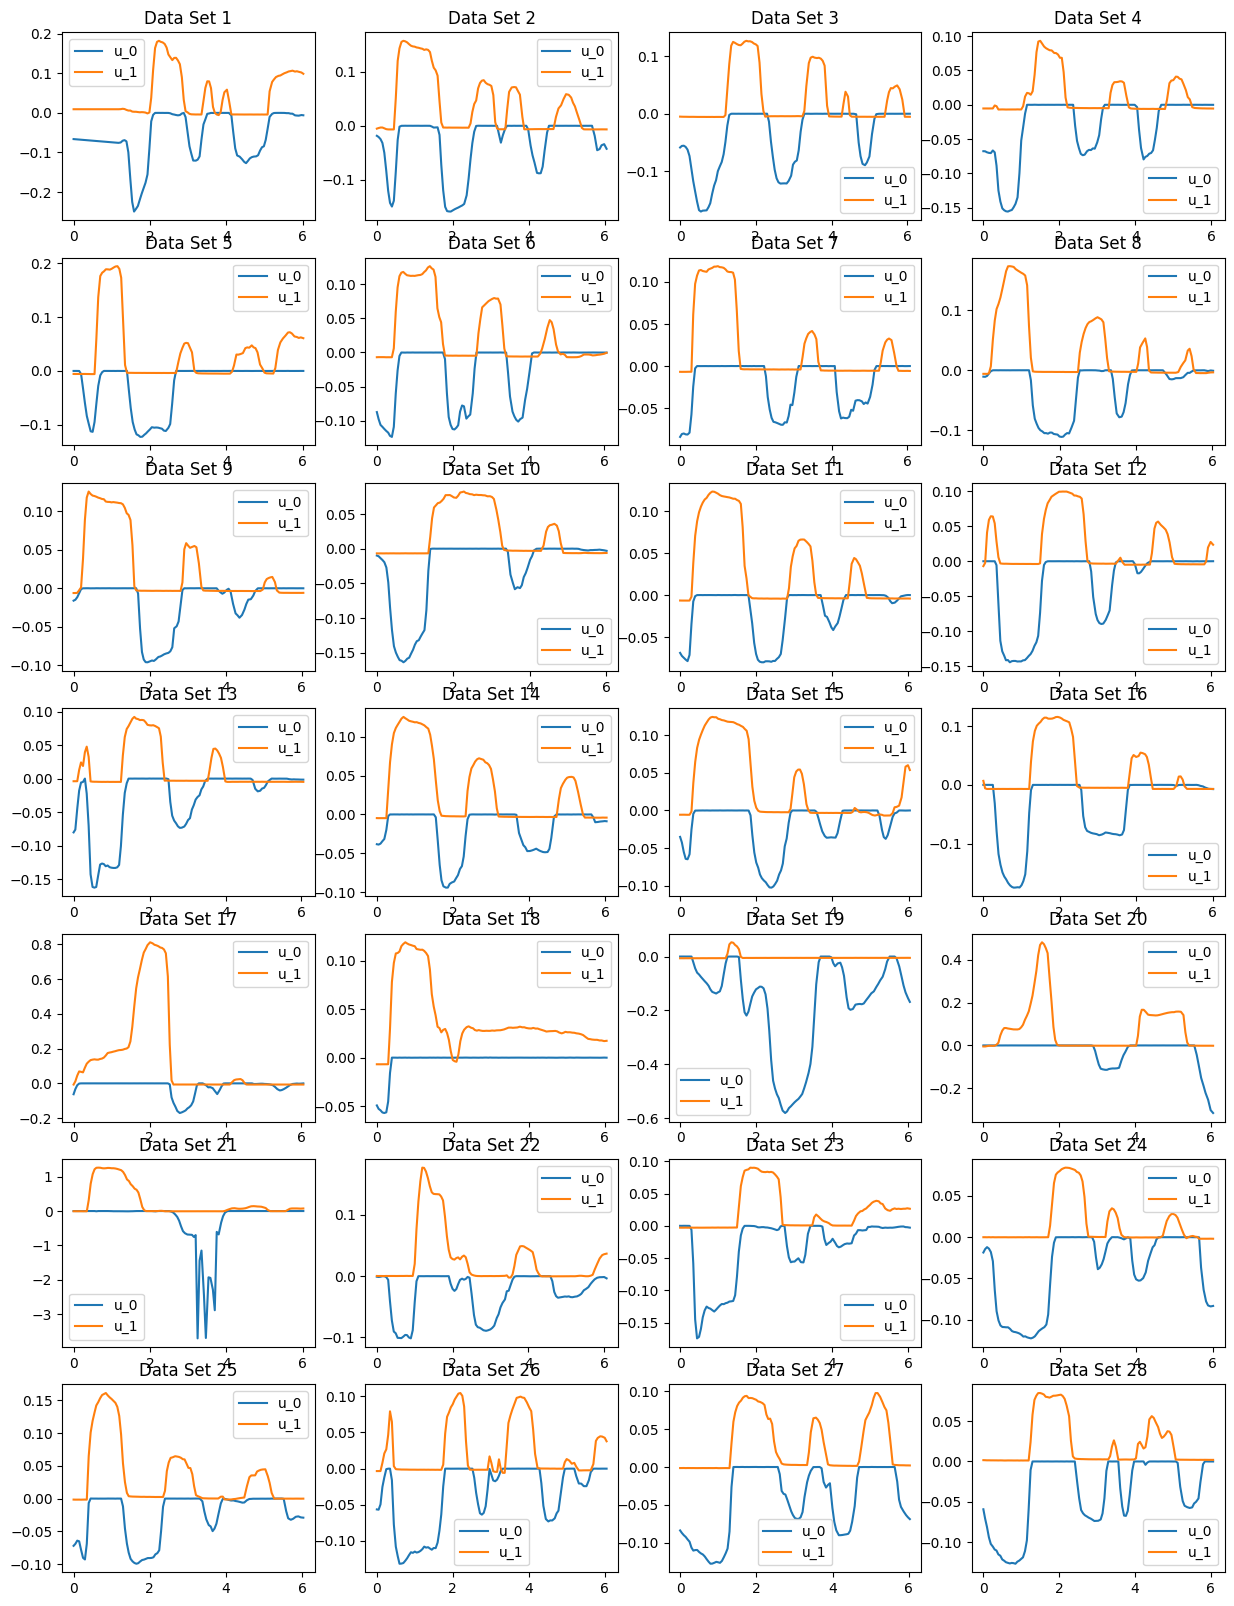

In [62]:
#copied from the section above. Used ChatGPT for illustration
import matplotlib.pyplot as plt
num_data_sets = 28
num_rows = 7
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))  # Adjust figsize as needed

for i in range(num_data_sets):
    this_ = gravity_list_10[i]
    this_data = this_.values
    this_data[:, 6] -= this_data[0, 6]
    x_time = this_data[:, 6]
    u_1 = this_data[:, 0]
    u_2 = this_data[:, 1]

    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    ax.plot(x_time, u_1, label='u_0')
    ax.plot(x_time, u_2, label='u_1')
    ax.set_title(f'Data Set {i+1}')
    ax.legend()

# Hide any empty subplots
for i in range(num_data_sets, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

## For sum u1 u2

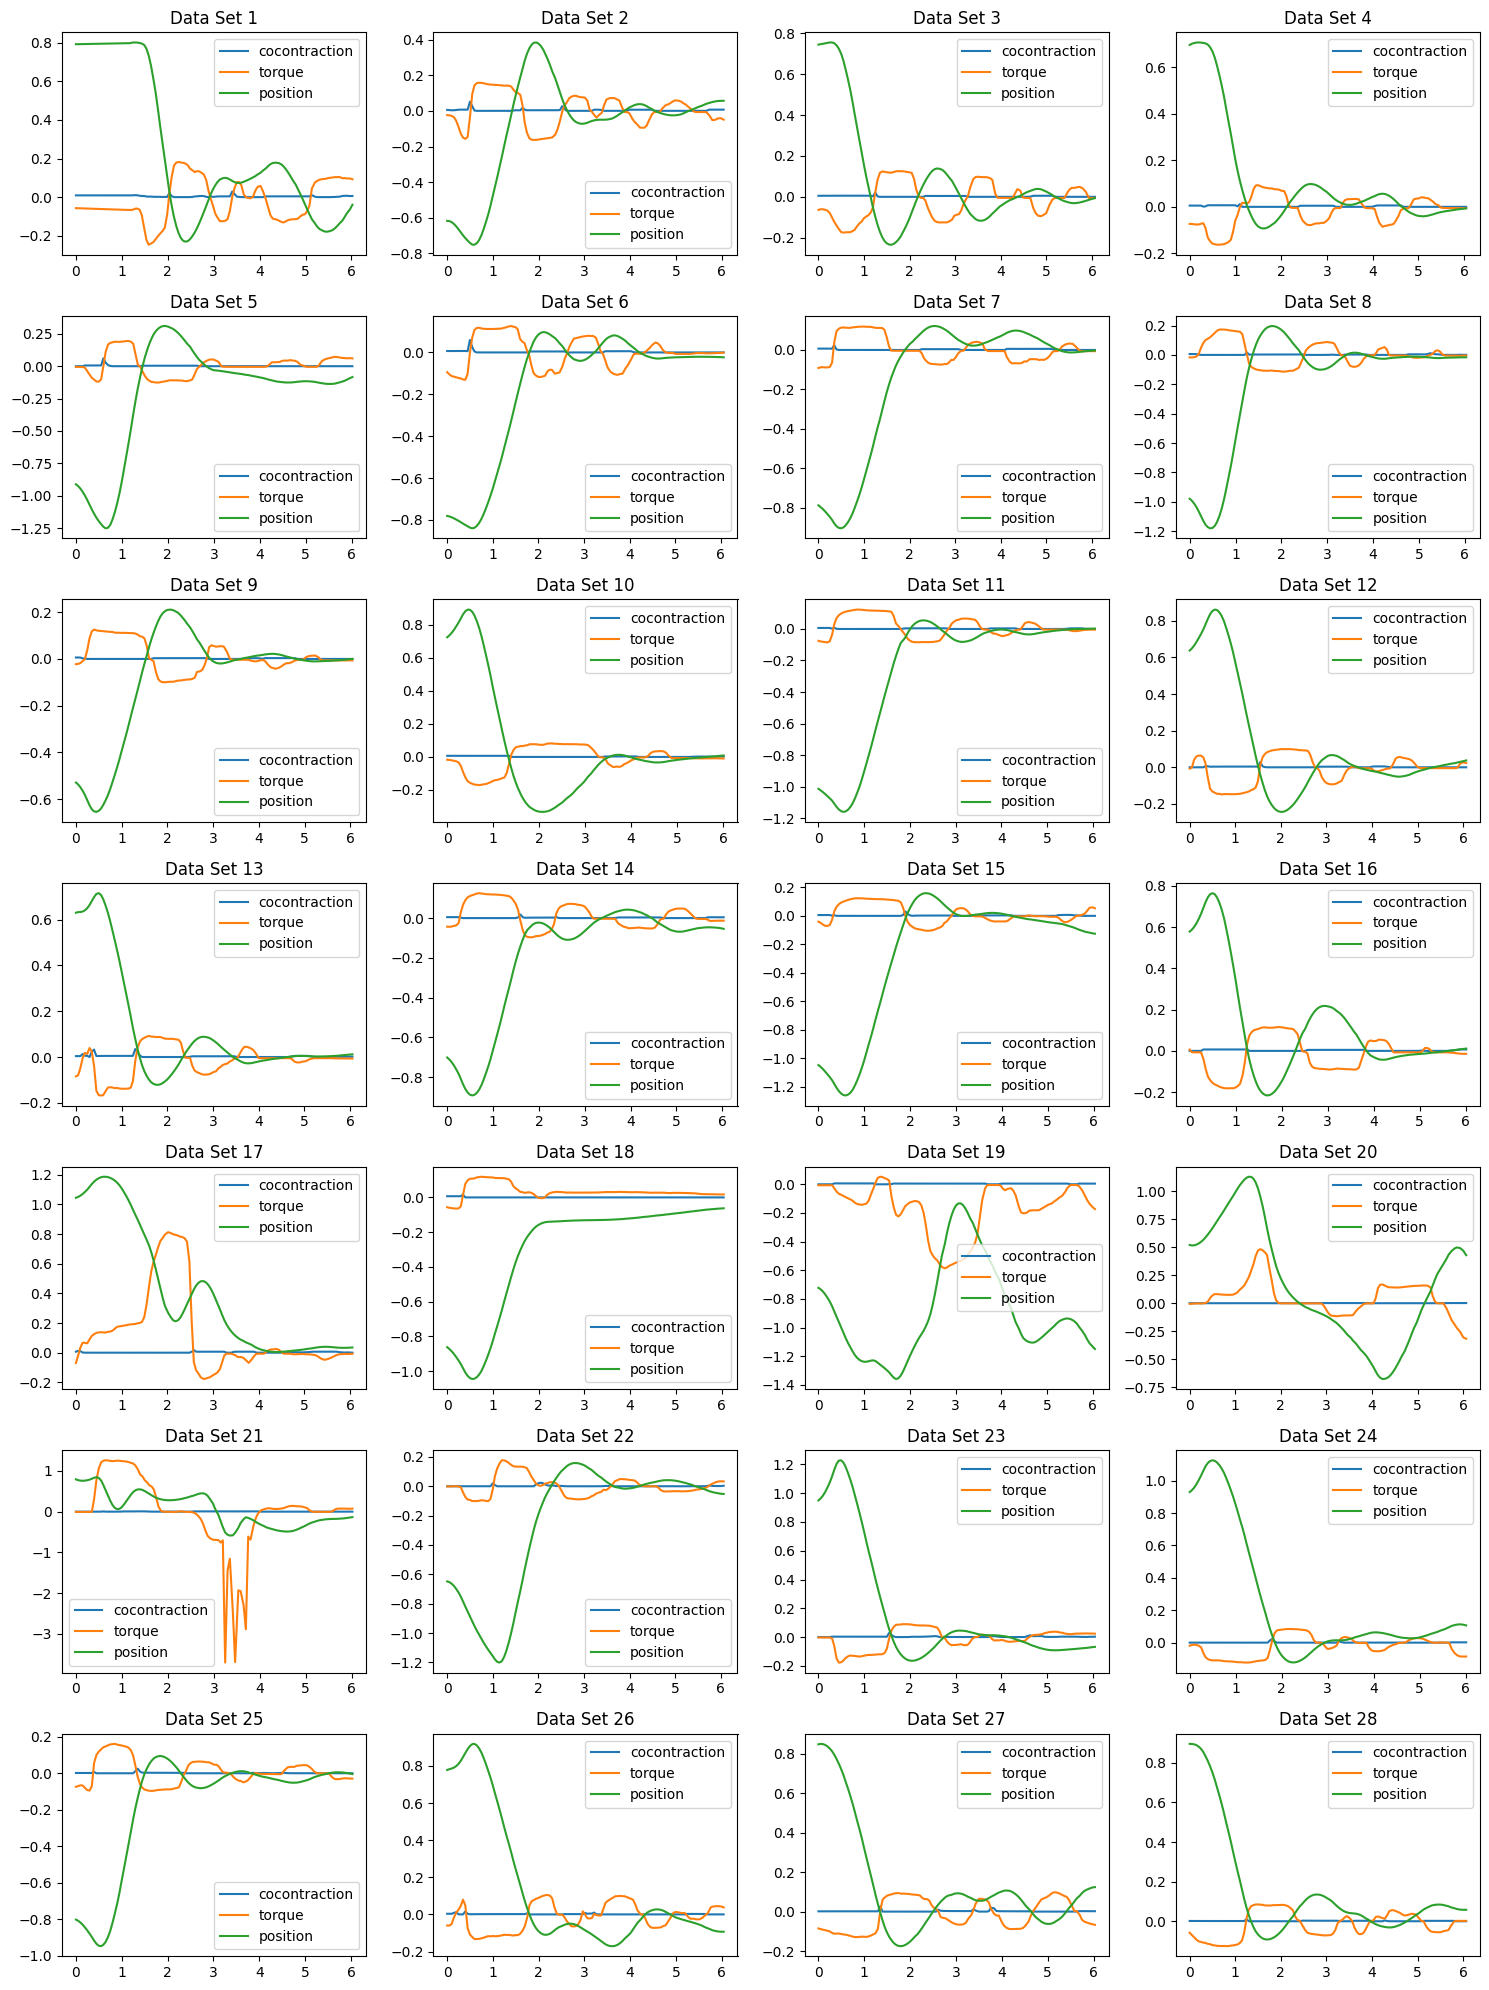

In [63]:
#copied from the section above. Used ChatGPT for illustration
import matplotlib.pyplot as plt
num_data_sets = 28
num_rows = 7
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))  # Adjust figsize as needed

for i in range(num_data_sets):
    this_ = gravity_list_10[i]
    this_data = this_.values
    this_data[:, 6] -= this_data[0, 6]
    x_time = this_data[:, 6]
    u_1 = this_data[:, 0]
    u_2 = this_data[:, 1]
    position = this_data[:, 2]
    velocity = this_data[:, 3]
    acceleration = this_data[:, 4]

    cocontraction = np.minimum(np.abs(u_1), np.abs(u_2))
    #torque = np.abs(np.abs(u_1) - np.abs(u_2))
    torque = u_1 + u_2

    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    ax.plot(x_time, cocontraction, label='cocontraction')
    ax.plot(x_time, torque, label='torque')
    ax.plot(x_time, position, label='position')
    #ax.plot(x_time, velocity, label='velocity')
    #ax.plot(x_time, acceleration*10, label='acceleration')
    #ax.plot(x_time, u_1, label='u_0')
    #ax.plot(x_time, u_2, label='u_1')
    ax.set_title(f'Data Set {i+1}')
    ax.legend()

# Hide any empty subplots
for i in range(num_data_sets, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

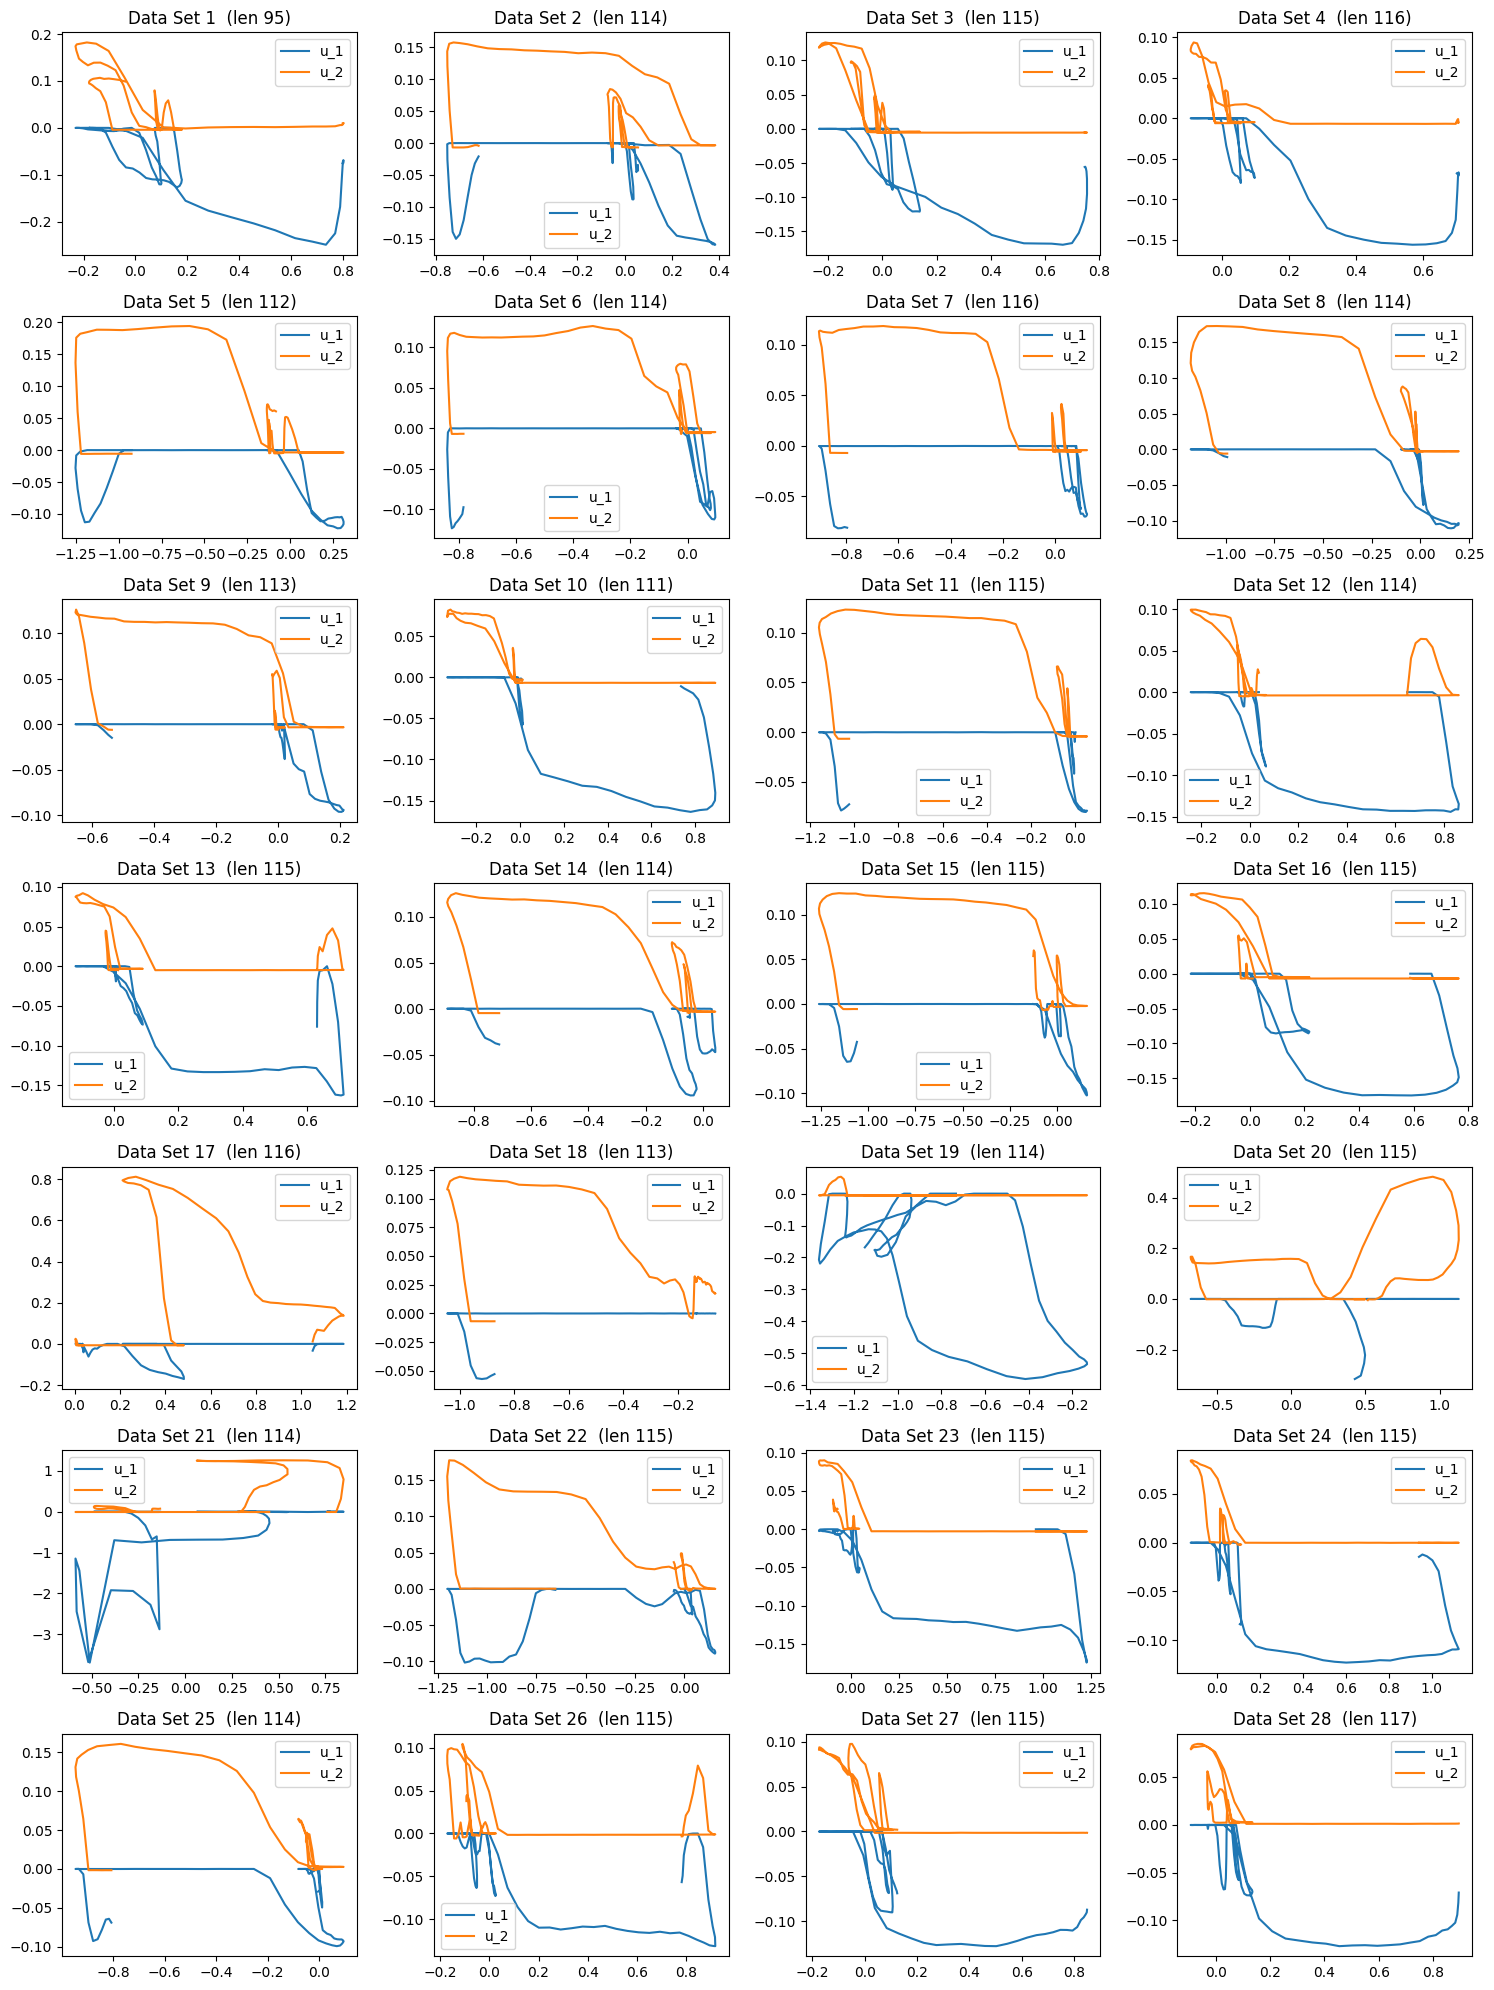

In [28]:
ig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))  # Adjust figsize as needed

for i in range(28):
    this_ = gravity_list_20[i]
    this_data = this_.values
    x_time = this_data[1:, 2]
    u_1 = this_data[1:, 0]
    u_2 = this_data[1:, 1]

    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    ax.plot(x_time, u_1, label='u_1')
    ax.plot(x_time, u_2, label='u_2')
    ax.set_title(f'Data Set {i+1}  (len {len(this_data)})')
    ax.legend()

# Hide any empty subplots
for i in range(num_data_sets, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

In [ ]:
ig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))  # Adjust figsize as needed

for i in range(28):
    this_ = gravity_list_30[i]
    this_data = this_.values
    x_time = this_data[1:, 2]
    u_0 = this_data[1:, 0]
    u_1 = this_data[1:, 1]

    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    ax.plot(x_time, u_0, label='u_0')
    ax.plot(x_time, u_1, label='u_1')
    ax.set_title(f'Data Set {i+1}')
    ax.legend()

# Hide any empty subplots
for i in range(num_data_sets, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


In [ ]:
ig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))  # Adjust figsize as needed

for i in range(28):
    this_ = gravity_list_40[i]
    this_data = this_.values
    x_time = this_data[1:, 2]
    u_0 = this_data[1:, 0]
    u_1 = this_data[1:, 1]

    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    ax.plot(x_time, u_0, label='u_0')
    ax.plot(x_time, u_1, label='u_1')
    ax.set_title(f'Data Set {i+1}')
    ax.legend()

# Hide any empty subplots
for i in range(num_data_sets, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

